# Thresholding
このノートブックでは、グローバル閾値処理、Otsuの方法、適応的閾値処理を用いた二値化を行います。

## 1. グローバル閾値処理 (Global Thresholding)
グローバル閾値処理は、画像全体に対して一律の閾値を設定し、ピクセル値がその閾値より大きいか小さいかで白と黒に分類します。設定された閾値は全ピクセルに対して同一であるため、照明が均一な画像に適していますが、光の影響がある画像には不向きです。

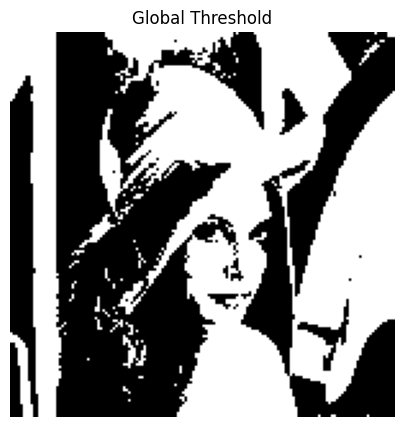

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image_path = './sample_image/Lenna.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# グローバル閾値処理
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 結果表示
plt.figure(figsize=(5, 5))
plt.title("Global Threshold")
plt.imshow(global_thresh, cmap='gray')
plt.axis('off')
plt.show()

## 2. Otsuの方法 (Otsu's Method)
Otsuの方法は、グローバル閾値処理の一種で、ヒストグラムの分布を分析して最適な閾値を自動で決定します。画像の濃淡が二峰性（2つの異なる明暗を持つ）である場合に効果的です。

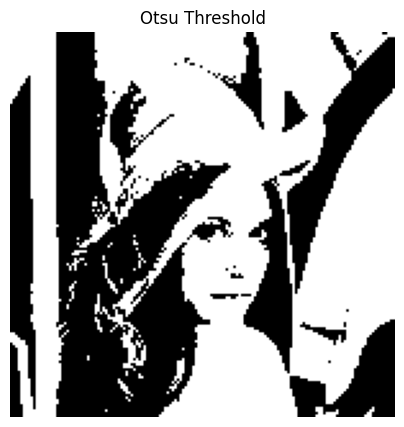

In [ ]:
# Otsuの方法
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 結果表示
plt.figure(figsize=(5, 5))
plt.title("Otsu Threshold")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')
plt.show()

## 3. 適応的閾値処理 (平均法)
適応的閾値処理は、局所的なピクセルの値に応じて動的に閾値を設定する手法です。グローバルな閾値の代わりに、小さな領域ごとに閾値を計算するため、照明が不均一な画像や影がかかっている画像に適しています。代表的な手法として、平均法とガウシアン法の2つがあります。</br>
平均法 (Mean Method): 指定された領域内の平均値を閾値として使用します

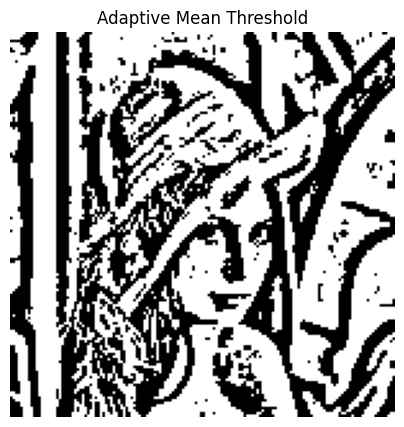

In [ ]:
# 適応的閾値処理 (平均法)
adaptive_mean_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                             cv2.THRESH_BINARY, 11, 2)

# 結果表示
plt.figure(figsize=(5, 5))
plt.title("Adaptive Mean Threshold")
plt.imshow(adaptive_mean_thresh, cmap='gray')
plt.axis('off')
plt.show()

## 4. 適応的閾値処理 (ガウシアン法)
ガウシアン法 (Gaussian Method): 指定された領域内のピクセルに重み付けした平均を計算し、閾値として使用します。より細かい影の変動に対応できます。

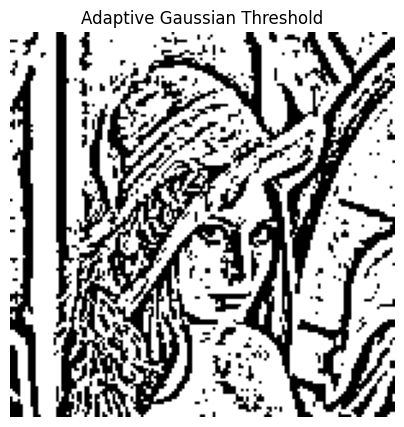

In [ ]:
# 適応的閾値処理 (ガウシアン法)
adaptive_gaussian_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                                 cv2.THRESH_BINARY, 11, 2)

# 結果表示
plt.figure(figsize=(5, 5))
plt.title("Adaptive Gaussian Threshold")
plt.imshow(adaptive_gaussian_thresh, cmap='gray')
plt.axis('off')
plt.show()